In [203]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

IMPORT MNIST DATA SET using Tensor Flow and load it into MNISTdata object


In [192]:
MNISTdata = tf.keras.datasets.mnist 

In [204]:
(train_images, Train_labels), (Test_images, Test_labels) = MNISTdata.load_data()

In [205]:
def apply_edge_detection(images, method):
    num_images, img_rows, img_cols = images.shape
    new_images = np.zeros((num_images, img_rows, img_cols))
    for i in range(num_images):
        # Apply edge detection to image using specified method
        if method == "sobel":
            dx = cv2.Sobel(images[i], cv2.CV_64F, 1, 0, ksize=3)
            dy = cv2.Sobel(images[i], cv2.CV_64F, 0, 1, ksize=3)
            new_images[i] = np.sqrt(dx**2 + dy**2)
        elif method == "canny":
            new_images[i] = cv2.Canny(images[i], 100, 200)
        else:
            raise ValueError("Invalid edge detection method")
    # Reshape images to (28, 28, 1)
    new_images = np.expand_dims(new_images, -1)
    return new_images

In [206]:
x_train_Large = apply_edge_detection(train_images, "sobel")
x_test_Large = apply_edge_detection(Test_images, "sobel")
trainX = x_train_Large.reshape((x_train_Large.shape[0], 28, 28, 1))
testX = x_test_Large.reshape((x_test_Large.shape[0], 28, 28, 1))

In [177]:
#(train_images, Train_labels), (Test_images, Test_labels) = MNISTdata.load_data()
#trainX =train_images.reshape((train_images.shape[0], 28, 28, 1))
#testX = Test_images.reshape((Test_images.shape[0], 28, 28, 1))

In [196]:
train_images = trainX / 255.0
Test_images = testX / 255.0

Divide the object ( data ) into 2 sections ... The train and the test section ..... and load data


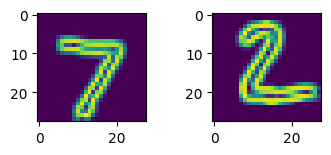

In [207]:
for i in range(2):
  # defining a pyplot 
  plt.subplot(330 +1 +i)
 
 # showing the first 9 images ( plotting the raw pixel data )
  plt.imshow(testX[i])



The above is the raw data ( thats how data is)


In [208]:

print(trainX.shape)
print(trainX[0])

(60000, 28, 28, 1)
[[[   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]]

 [[   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0.        ]
  [   0

** The above images in Matrix form (60000 28 28)

1) So we have a collection of 60000images and each image is 28 * 28 pixel dimension
 
2) Each number represents the pixel intensity 

3) the range is from 0 to 255 



## * Lets normalize the data now  ( we are rounding of it to the scale of 0 to 1) 



In [199]:
#train_images = trainX / 255.0
#Test_images = testX / 255.0

#*** Fully Connected layer ( Dense)

# ** Now lets build the Neural Network

#* 1) We are creating a layer of networks in sequence and inside this function we need to define each and every layer 

# *2) One input, one output, one hidden layer 

In [209]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(128, activation= 'relu'),
                                    tf.keras.layers.Dense(128, activation= 'relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# * We are using Adam optimizer 
# * and the cost function is Crossentropy
# * and Metrics to print accuracy at every step of the model



In [210]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#* Now lets Train the model

#* here we are giving the training data set. 
#* 1) training images and training labels and the number of iterations we are putting it to 10


In [211]:
 DenseModel = model.fit(trainX, Train_labels, epochs = 15, validation_data= (testX, Test_labels))

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 6.7212 - accuracy: 0.7038 - val_loss: 0.9702 - val_accuracy: 0.7292
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9157 - accuracy: 0.7671 - val_loss: 0.8500 - val_accuracy: 0.7744
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8947 - accuracy: 0.7809 - val_loss: 0.8733 - val_accuracy: 0.7706
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8752 - accuracy: 0.7753 - val_loss: 0.8346 - val_accuracy: 0.7659
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8576 - accuracy: 0.7770 - val_loss: 0.8523 - val_accuracy: 0.8168
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7221 - accuracy: 0.8106 - val_loss: 0.7242 - val_accuracy: 0.8373
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6503 - accuracy: 0.8307 - val_loss: 0.5947 - val_accuracy:

# * Lets test the data set 




In [212]:
model.evaluate(testX, Test_labels, verbose=2)

313/313 - 1s - loss: 0.3382 - accuracy: 0.9067 - 601ms/epoch - 2ms/step


[0.33823415637016296, 0.9067000150680542]

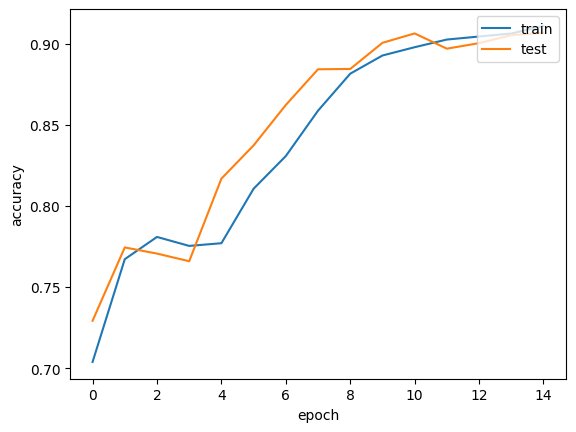

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(DenseModel.history['accuracy'])
plt.plot(DenseModel.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()




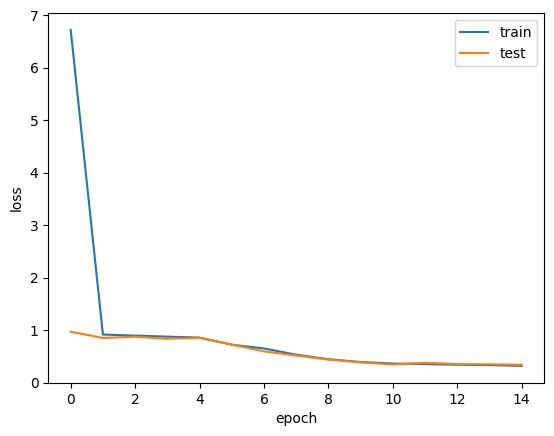

In [214]:
plt.plot(DenseModel.history['loss'])
plt.plot(DenseModel.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#* We got an Accuracy of 95% ( Not Bad)

#* Lets check the Accuracy for Individual Element


313/313 [==============================] - 1s 2ms/step
2


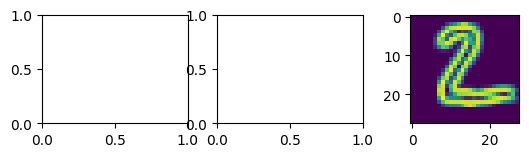

In [215]:
for i in range(3):
  # defining a pyplot 
  plt.subplot(330 +1 +i)
 
 # showing the first 9 images ( plotting the raw pixel data )
plt.imshow(testX[1])
predict_images= model.predict(testX)
print(np.argmax(predict_images[1])) # to check maximum probability

#* We picked the second element from data set (index 2) and checked it to see if it is predicting correctly and it did good prediction 

#*** For CNN

In [221]:
from tensorflow.keras import layers

In [222]:

model_CNN = tf.keras.models.Sequential()

In [223]:

model_CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(100, activation='relu'))
model_CNN.add(layers.Dense(10))
model_CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_CNN.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 1600)              0         
                                                                 
 dense_43 (Dense)            (None, 100)             

#* Now lets train the CNN network



In [224]:
CNN_Train = model_CNN.fit(trainX, Train_labels, epochs = 10, validation_data= (testX, Test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 0.9571 - accuracy: 0.9243 - val_loss: 0.1074 - val_accuracy: 0.9688
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0928 - accuracy: 0.9734 - val_loss: 0.1055 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0734 - accuracy: 0.9784 - val_loss: 0.0813 - val_accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9824 - val_loss: 0.0786 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0525 - accuracy: 0.9845 - val_loss: 0.0692 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9867 - val_loss: 0.0576 - val_accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0583 - val_accuracy

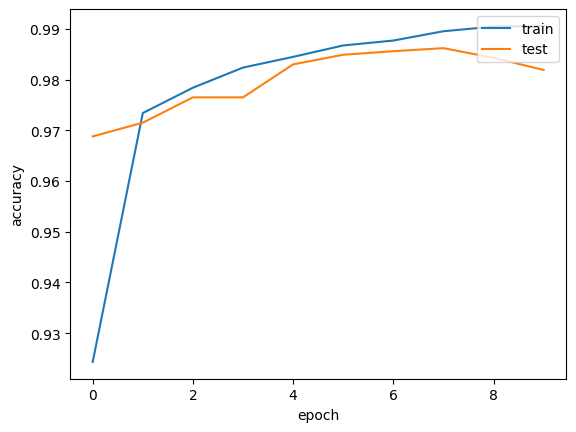

In [225]:
plt.plot(CNN_Train.history['accuracy'])
plt.plot(CNN_Train.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

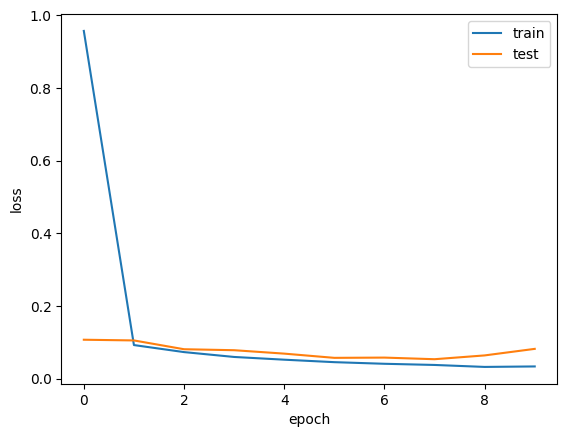

In [226]:
plt.plot(CNN_Train.history['loss'])
plt.plot(CNN_Train.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 2ms/step
7


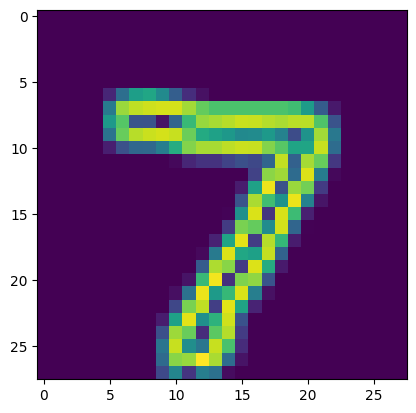

In [227]:
plt.imshow(testX[0])
predict_images= model.predict(testX)
print(np.argmax(predict_images[0])) # to check maximum probability

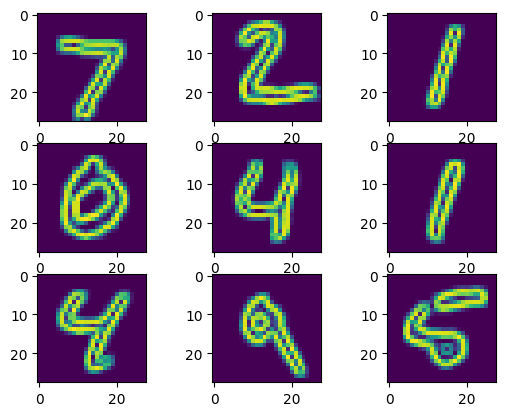

In [228]:
for i in range(9):
  # defining a pyplot 
  plt.subplot(330 +1 +i)
 
 # showing the first 9 images ( plotting the raw pixel data )
  plt.imshow(testX[i])